# Multiple WFE-resolution test

#### Train the same model with different WFE resolutions using the high resolution (4096x4096) dataset.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns

def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 3,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

In [39]:
# Metrics path
metrics_path = '../wf-outputs/metrics/'
metrics_file = 'metrics-poly_full_poly_wfeRes_{}.npy'

# Log files path
log_files_paht = '../wf-outputs/log-files/poly_full_poly_wfeRes_{}_output.log'

# Metrics dictionaries
shape_metrics = ['rmse_e1','std_rmse_e1','rel_rmse_e1','std_rel_rmse_e1','rmse_e2','std_rmse_e2','rel_rmse_e2','std_rel_rmse_e2','rmse_R2_meanR2','std_rmse_R2_meanR2','pix_rmse','pix_rmse_std','rel_pix_rmse','rel_pix_rmse_std']
opd_metrics = ['rmse_opd','rmse_std_opd','rel_rmse_opd','rel_rmse_std_opd']
poly_metrics = ['rmse','std_rmse','rel_rmse','std_rel_rmse']

In [67]:
# Load metrics
models_id = [64, 128, 256]
metrics_models_list = [np.load(metrics_path+metrics_file.format(str(id)), allow_pickle=True)[()] for id in models_id]

# Load computing times
times = [float(open(log_files_paht.format(str(id))).readlines()[-3][20:-1]) for id in models_id]

In [31]:
metrics_models_list[0]['test_metrics']['poly_metric']
metrics_models_list[0]['test_metrics']['opd_metric']
metrics_models_list[0]['test_metrics']['shape_results_dict']

0.018972663880325903

In [115]:
# Load metrics
rmse = np.array([model['test_metrics']['poly_metric']['rmse'] for model in metrics_models_list])
s_rmse = np.array([model['test_metrics']['poly_metric']['std_rmse'] for model in metrics_models_list])

rel_rmse_3x = np.array([model['test_metrics']['shape_results_dict']['rel_pix_rmse'] for model in metrics_models_list])
rel_rmse_3x_std = np.array([model['test_metrics']['shape_results_dict']['rel_pix_rmse_std'] for model in metrics_models_list])

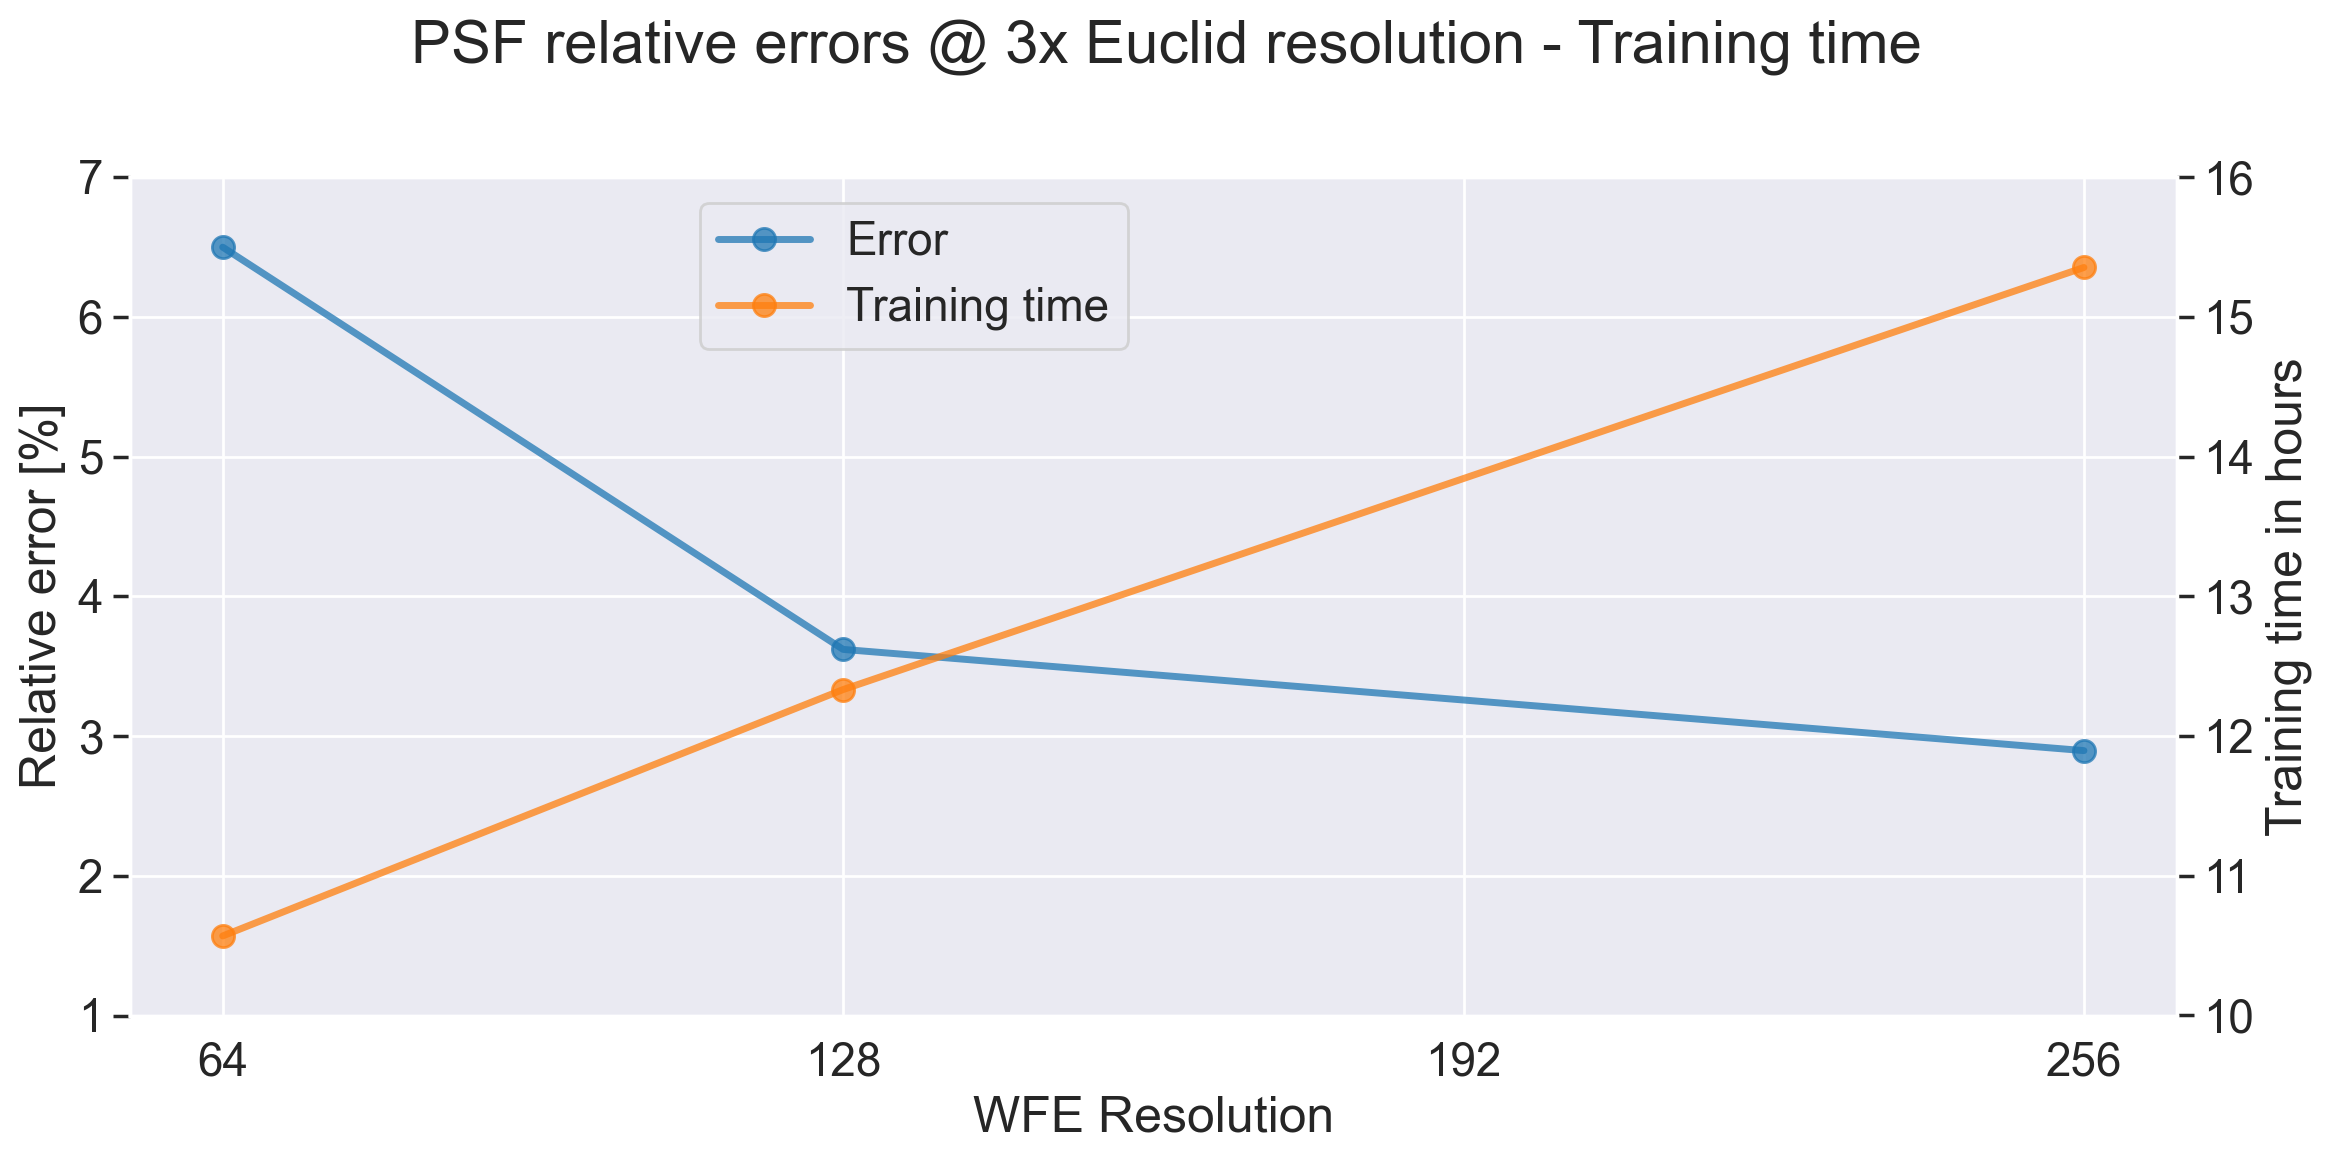

In [168]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

fig, ax1 = plt.subplots(figsize=(12, 6),facecolor='white')

fig.suptitle('PSF relative errors @ 3x Euclid resolution - Training time')

color = 'tab:blue'
ax1.set_xlabel('WFE Resolution')
ax1.set_ylabel('Relative error [%]')
ax1.plot(np.array(models_id), rel_rmse_3x,color=color,label='Error', **kwargs)
# ax1.errorbar(np.array(models_id), rel_rmse_3x, rel_rmse_3x_std, solid_capstyle='projecting', capsize=5 ,color=color,label='Error', **kwargs)
ax1.tick_params(axis='y')
ax1.set_ylim((1,7))
ax1.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%i'))
#ax1.locator_params(axis='y', nbins=8)
ax1.xaxis.set_ticks([64,128,192,256])


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Training time in hours')  # we already handled the x-label with ax1
ax2.plot(np.array(models_id), np.array(times)/3600, color=color,label='Training time', **kwargs)
ax2.tick_params(axis='y')
ax2.grid(None)
ax2.set_ylim((10,16))
ax2.yaxis.set_major_locator(mpl.ticker.LinearLocator(7))

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend(loc=(0.3,0.7))

plt.show()


In [65]:
float(open(log_files_paht.format(str(128))).readlines()[-3][20:-1])

44395.963512

In [78]:
metrics_models_list[0]['test_metrics']['shape_results_dict'].keys()

dict_keys(['pred_e1_HSM', 'pred_e2_HSM', 'pred_R2_HSM', 'GT_pred_e1_HSM', 'GT_ped_e2_HSM', 'GT_pred_R2_HSM', 'rmse_e1', 'std_rmse_e1', 'rel_rmse_e1', 'std_rel_rmse_e1', 'rmse_e2', 'std_rmse_e2', 'rel_rmse_e2', 'std_rel_rmse_e2', 'rmse_R2_meanR2', 'std_rmse_R2_meanR2', 'pix_rmse', 'pix_rmse_std', 'rel_pix_rmse', 'rel_pix_rmse_std', 'output_Q', 'output_dim', 'n_bins_lda'])